<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Final project - Data Visualization
</div>

## **Thông tin nhóm**

#### Thành viên 1:
##### * **Họ và tên:** Võ Duy Anh
##### * **MSSV:** 21127221

#### Thành viên 2:
##### * **Họ và tên:** Nguyễn Mậu Gia Bảo
##### * **MSSV:** 21127583

#### Thành viên 3:
##### * **Họ và tên:** Vũ Minh Phát
##### * **MSSV:** 21127739

### **Thư viện hỗ trợ**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

### **1. Giới thiệu về bộ dữ liệu**

### **2. Khám phá dữ liệu**

#### Đọc dữ liệu từ file

In [2]:
data = pd.read_csv("hotel_bookings.csv")
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


#### 📌 Dữ liệu có bao nhiêu hàng và bao nhiêu cột?

In [3]:
row,col = data.shape
print(f'Dữ liệu có {row} hàng và {col} cột')

Dữ liệu có 119390 hàng và 32 cột


#### 📌 Ý nghĩa của mỗi hàng là gì?

Biểu diễn một đơn đặt phòng khách sạn cụ thể

####  📌 Dữ liệu có các dòng bị lặp không?

In [4]:
detectDupSeries = data.duplicated(keep='first')
num_duplicated_rows = detectDupSeries.sum()

if num_duplicated_rows == 0:
    print("Dữ liệu không có dòng bị trùng lặp!")
else:
    print(f"Dữ liệu có {num_duplicated_rows} dòng bị trùng lặp.")

Dữ liệu có 31994 dòng bị trùng lặp.


In [5]:
duplicate_ratio = num_duplicated_rows / len(data)
print(f"Tỷ lệ trùng lặp của dữ liệu là: {duplicate_ratio:.2%}")

Tỷ lệ trùng lặp của dữ liệu là: 26.80%


Nhìn chung, với tỉ lệ trùng lặp hơn 26% có thể thấy bộ dữ liệu đang có tỉ lệ trùng lặp khá lớn

Loại bỏ các dòng trùng lặp

In [6]:
data = data.drop_duplicates()

#### 📌 Ý nghĩa của mỗi cột là gì?

<table style="width: 100%; border-collapse: collapse;">
  <thead>
    <tr>
      <th style="min-width: 10px; width: 30px; background-color: #04B1CC; color: white; font-size :15px; font-weight: bold; text-align: left; padding: 8px;">STT</th>
      <th style="background-color: #04B1CC; color: white; font-size :15px; font-weight: bold; text-align: left; padding: 8px;">Cột</th>
      <th style="background-color: #04B1CC; color: white; font-size :15px; font-weight: bold; text-align: left; padding: 8px;">Ý nghĩa</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="font-size: 14px; text-align: left;">1</td>
      <td style="font-size: 14px; text-align: left;">hotel</td>
      <td style="font-size: 14px; text-align: left;">Tên khách sạn</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">2</td>
      <td style="font-size: 14px; text-align: left;">is_canceled</td>
      <td style="font-size: 14px; text-align: left;">Cờ lệnh liệu đặt phòng đã bị hủy hay không (0 nếu không hủy, 1 nếu đã hủy).</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">3</td>
      <td style="font-size: 14px; text-align: left;">lead_time</td>
      <td style="font-size: 14px; text-align: left;">Số ngày giữa ngày đặt phòng và ngày đến.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">4</td>
      <td style="font-size: 14px; text-align: left;">arrival_date_year</td>
      <td style="font-size: 14px; text-align: left;"> Năm của ngày đến.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">5</td>
      <td style="font-size: 14px; text-align: left;">arrival_date_month</td>
      <td style="font-size: 14px; text-align: left;">Tháng của ngày đến.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">6</td>
      <td style="font-size: 14px; text-align: left;">arrival_date_week_number</td>
      <td style="font-size: 14px; text-align: left;">Tuần trong năm của ngày đến.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">7</td>
      <td style="font-size: 14px; text-align: left;">arrival_date_day_of_month</td>
      <td style="font-size: 14px; text-align: left;">Ngày trong tháng của ngày đến.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">8</td>
      <td style="font-size: 14px; text-align: left;">stays_in_weekend_nights</td>
      <td style="font-size: 14px; text-align: left;">Số đêm lưu trú vào cuối tuần.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">9</td>
      <td style="font-size: 14px; text-align: left;">stays_in_week_nights</td>
      <td style="font-size: 14px; text-align: left;">Số đêm lưu trú vào các ngày trong tuần.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">10</td>
      <td style="font-size: 14px; text-align: left;">adults</td>
      <td style="font-size: 14px; text-align: left;">Số người lớn.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">11</td>
      <td style="font-size: 14px; text-align: left;">children</td>
      <td style="font-size: 14px; text-align: left;">Số trẻ em.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">12</td>
      <td style="font-size: 14px; text-align: left;">babies</td>
      <td style="font-size: 14px; text-align: left;">Số em bé.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">13</td>
      <td style="font-size: 14px; text-align: left;">meal</td>
      <td style="font-size: 14px; text-align: left;">Loại bữa ăn.</td>
    </tr>
     <tr>
      <td style="font-size: 14px; text-align: left;">14</td>
      <td style="font-size: 14px; text-align: left;">country</td>
      <td style="font-size: 14px; text-align: left;">Quốc gia của khách hàng.</td>
    </tr>
     <tr>
      <td style="font-size: 14px; text-align: left;">15</td>
      <td style="font-size: 14px; text-align: left;">market_segment</td>
      <td style="font-size: 14px; text-align: left;">Phân đoạn thị trường.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">16</td>
      <td style="font-size: 14px; text-align: left;">distribution_channel</td>
      <td style="font-size: 14px; text-align: left;">Kênh phân phối.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">17</td>
      <td style="font-size: 14px; text-align: left;">is_repeated_guest</td>
      <td style="font-size: 14px; text-align: left;">Cờ lệnh thể hiện liệu khách hàng đã từng lưu trú trước đó hay không.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">18</td>
      <td style="font-size: 14px; text-align: left;">previous_cancellations</td>
      <td style="font-size: 14px; text-align: left;">Số lần hủy đặt phòng trước đó.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">19</td>
      <td style="font-size: 14px; text-align: left;">previous_bookings_not_canceled</td>
      <td style="font-size: 14px; text-align: left;">Số lần đặt phòng trước đó nhưng không bị hủy.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">20</td>
      <td style="font-size: 14px; text-align: left;">reserved_room_type</td>
      <td style="font-size: 14px; text-align: left;">Loại phòng đã đặt.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">21</td>
      <td style="font-size: 14px; text-align: left;">assigned_room_type</td>
      <td style="font-size: 14px; text-align: left;">Loại phòng được gán cho đơn đặt phòng.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">22</td>
      <td style="font-size: 14px; text-align: left;">booking_changes</td>
      <td style="font-size: 14px; text-align: left;">Số lần thay đổi đặt phòng.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">23</td>
      <td style="font-size: 14px; text-align: left;">deposit_type</td>
      <td style="font-size: 14px; text-align: left;">Loại tiền đặt cọc.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">24</td>
      <td style="font-size: 14px; text-align: left;">agent</td>
      <td style="font-size: 14px; text-align: left;">ID của đại lý đặt phòng.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">25</td>
      <td style="font-size: 14px; text-align: left;">company</td>
      <td style="font-size: 14px; text-align: left;">ID của công ty đặt phòng.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">26</td>
      <td style="font-size: 14px; text-align: left;">days_in_waiting_list</td>
      <td style="font-size: 14px; text-align: left;">Số ngày trong danh sách chờ.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">27</td>
      <td style="font-size: 14px; text-align: left;">customer_type</td>
      <td style="font-size: 14px; text-align: left;">Loại khách hàng.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">28</td>
      <td style="font-size: 14px; text-align: left;">adr</td>
      <td style="font-size: 14px; text-align: left;">Giá trung bình hàng đêm (Average Daily Rate).</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">29</td>
      <td style="font-size: 14px; text-align: left;">required_car_parking_spaces</td>
      <td style="font-size: 14px; text-align: left;">Số lượng chỗ đậu xe yêu cầu.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">30</td>
      <td style="font-size: 14px; text-align: left;">total_of_special_requests</td>
      <td style="font-size: 14px; text-align: left;">Tổng số yêu cầu đặc biệt.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">31</td>
      <td style="font-size: 14px; text-align: left;">reservation_status</td>
      <td style="font-size: 14px; text-align: left;">Trạng thái đặt phòng cuối cùng.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">32</td>
      <td style="font-size: 14px; text-align: left;">reservation_status_date</td>
      <td style="font-size: 14px; text-align: left;">Ngày cập nhật trạng thái đặt phòng cuối cùng.</td>
    </tr>
  </tbody>
</table>

#### 📌 Kiểu dữ liệu hiện tại của mỗi cột là gì? Có cột nào có kiểu dữ liệu không phù hợp không?

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                            8739

- `is_canceled` là cờ lệnh để thể hiện liệu đặt phòng có bị huỷ hay không, do đó cần chuyển về object để phân vào categorical.
- `children` chỉ số lượng trẻ em, do đó cần chuyển về dạng int64. Tuy nhiên vì dữ liệu đang chứa NULL, do đó sẽ chuyển về dạng int64 sau khi fill missing value.
- `is_repeated_guest` là cờ lệnh để thể hiện khách hàng có từng lưu trú ở đó không, do đó cần chuyển về object để phân vào categorical.
- `reservation_status_date` biểu diễn cho ngày cập nhật trạng thái đặt phòng cuối cùng, do đó cần chuyển về dạng datetime.

In [8]:
data['is_canceled'] = data['is_canceled'].astype(str)
data['is_repeated_guest'] = data['is_repeated_guest'].astype(str)
data["reservation_status_date"] = pd.to_datetime(data["reservation_status_date"])

#### 📌 Đối với mỗi cột có kiểu dữ liệu số, các giá trị được phân bố như thế nào?

📚 Đối với các cột có kiểu dữ liệu số, nhóm sẽ tính toán một số thống kê cơ bản:
- Tỷ lệ phần trăm (từ 0 đến 100) giá trị bị thiếu
- The min
- The lower quartile (phân vị 25)
- The median (phân vị 50)
- The upper quartile (phân vị 75)
- The max


In [9]:
num_col_info_df = data.select_dtypes(exclude=['object', 'bool'])

def missing_ratio(s):
    return (s.isna().mean() * 100)

def median(df):
    return (df.quantile(0.5))

def lower_quartile(df):
    return (df.quantile(0.25))

def upper_quartile(df):
    return (df.quantile(0.75))

num_col_info_df = num_col_info_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
num_col_info_df.T

,missing_ratio,min,lower_quartile,median,upper_quartile,max
lead_time,0.0,0.0,11.0,49.0,125.0,737.0
arrival_date_year,0.0,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,0.0,1.0,16.0,27.0,37.0,53.0
arrival_date_day_of_month,0.0,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,0.0,0.0,0.0,1.0,2.0,19.0
stays_in_week_nights,0.0,0.0,1.0,2.0,4.0,50.0
adults,0.0,0.0,2.0,2.0,2.0,55.0
children,0.004577,0.0,0.0,0.0,0.0,10.0
babies,0.0,0.0,0.0,0.0,0.0,10.0
previous_cancellations,0.0,0.0,0.0,0.0,0.0,26.0


- Cột `company` có tỉ lệ thiếu rất cao, lên đến hơn 90% (94.306893%), do đó nhóm sẽ tiến hành loại bỏ cột này.
- Cột `children` với tỉ lệ thiếu nhỏ, nhóm điền bằng giá trị mode của thuộc tính này.
- Cột `agent` với tỉ lệ thiếu khá cao, nhóm điền bằng giá trị median của thuộc tính này do giá trị của nó có phân bố rộng.

In [10]:
data.drop('company', axis=1, inplace=True)
data['children'].fillna(data['children'].mode()[0], inplace=True)
data['agent'].fillna(data['agent'].median(), inplace=True)
data['children'] = data['children'].astype(np.int64)

In [11]:
# TEST
data.select_dtypes(exclude=['object', 'bool']).agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"]).T

,missing_ratio,min,lower_quartile,median,upper_quartile,max
lead_time,0.0,0.0,11.0,49.0,125.0,737.0
arrival_date_year,0.0,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,0.0,1.0,16.0,27.0,37.0,53.0
arrival_date_day_of_month,0.0,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,0.0,0.0,0.0,1.0,2.0,19.0
stays_in_week_nights,0.0,0.0,1.0,2.0,4.0,50.0
adults,0.0,0.0,2.0,2.0,2.0,55.0
children,0.0,0.0,0.0,0.0,0.0,10.0
babies,0.0,0.0,0.0,0.0,0.0,10.0
previous_cancellations,0.0,0.0,0.0,0.0,0.0,26.0


#### 📌 Đối với mỗi cột có kiểu dữ liệu không phải là số, các giá trị được phân phối như thế nào?

📚 Đối với các cột có kiểu dữ liệu không phải là số, nhóm sẽ tính toán:
- Tỷ lệ phần trăm (từ 0 đến 100) giá trị bị thiếu
- Số lượng giá trị khác nhau
- Hiển thị một vài giá trị và phần trăm (từ 0 đến 100) của từng giá trị


In [12]:
cat_col_info_df = data.select_dtypes(include=['object', 'bool'])

def missing_ratio(s):
    return (s.isna().mean() * 100)

def num_values(s):
    return len(s.value_counts())

def value_ratios(s):
    totalCount = (~s.isna()).sum()
    return ((s.value_counts()/totalCount*100).round(1)).to_dict()

cat_col_info_df = cat_col_info_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df.T

,missing_ratio,num_values,value_ratios
hotel,0.0,2,"{'City Hotel': 61.1, 'Resort Hotel': 38.9}"
is_canceled,0.0,2,"{'0': 72.5, '1': 27.5}"
arrival_date_month,0.0,12,"{'August': 12.9, 'July': 11.5, 'May': 9.6, 'Ap..."
meal,0.0,5,"{'BB': 77.8, 'SC': 10.8, 'HB': 10.4, 'Undefine..."
country,0.517186,177,"{'PRT': 31.6, 'GBR': 12.0, 'FRA': 10.2, 'ESP':..."
market_segment,0.0,8,"{'Online TA': 59.1, 'Offline TA/TO': 15.9, 'Di..."
distribution_channel,0.0,5,"{'TA/TO': 79.1, 'Direct': 14.9, 'Corporate': 5..."
is_repeated_guest,0.0,2,"{'0': 96.1, '1': 3.9}"
reserved_room_type,0.0,10,"{'A': 64.7, 'D': 19.9, 'E': 6.9, 'F': 3.2, 'G'..."
assigned_room_type,0.0,12,"{'A': 53.0, 'D': 25.7, 'E': 8.2, 'F': 4.2, 'G'..."


Cột `country` với tỉ lệ thiếu là 0.517186% , không đáng kể, do đó nhóm sẽ  điền giá trị thiếu bằng giá trị mode của cột.

In [13]:
data['country'].fillna(data['country'].mode()[0], inplace=True)

In [14]:
# TEST
data.select_dtypes(include=['object', 'bool'])\
    .agg([missing_ratio, num_values, value_ratios]).T

,missing_ratio,num_values,value_ratios
hotel,0.0,2,"{'City Hotel': 61.1, 'Resort Hotel': 38.9}"
is_canceled,0.0,2,"{'0': 72.5, '1': 27.5}"
arrival_date_month,0.0,12,"{'August': 12.9, 'July': 11.5, 'May': 9.6, 'Ap..."
meal,0.0,5,"{'BB': 77.8, 'SC': 10.8, 'HB': 10.4, 'Undefine..."
country,0.0,177,"{'PRT': 31.9, 'GBR': 11.9, 'FRA': 10.1, 'ESP':..."
market_segment,0.0,8,"{'Online TA': 59.1, 'Offline TA/TO': 15.9, 'Di..."
distribution_channel,0.0,5,"{'TA/TO': 79.1, 'Direct': 14.9, 'Corporate': 5..."
is_repeated_guest,0.0,2,"{'0': 96.1, '1': 3.9}"
reserved_room_type,0.0,10,"{'A': 64.7, 'D': 19.9, 'E': 6.9, 'F': 3.2, 'G'..."
assigned_room_type,0.0,12,"{'A': 53.0, 'D': 25.7, 'E': 8.2, 'F': 4.2, 'G'..."


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87396 non-null  object        
 1   is_canceled                     87396 non-null  object        
 2   lead_time                       87396 non-null  int64         
 3   arrival_date_year               87396 non-null  int64         
 4   arrival_date_month              87396 non-null  object        
 5   arrival_date_week_number        87396 non-null  int64         
 6   arrival_date_day_of_month       87396 non-null  int64         
 7   stays_in_weekend_nights         87396 non-null  int64         
 8   stays_in_week_nights            87396 non-null  int64         
 9   adults                          87396 non-null  int64         
 10  children                        87396 non-null  int64         
 11  babies

Lấy 5 dữ liệu ra làm mẫu

In [16]:
data.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5703,Resort Hotel,0,188,2016,May,20,11,2,8,2,...,0,No Deposit,314.0,0,Transient,80.16,0,0,Check-Out,2016-05-21
100894,City Hotel,0,7,2016,October,45,30,2,2,2,...,0,No Deposit,9.0,0,Transient,138.50,0,2,Check-Out,2016-11-03
38593,Resort Hotel,0,0,2017,July,29,21,0,2,2,...,0,No Deposit,241.0,0,Transient,160.00,0,1,Check-Out,2017-07-23
11591,Resort Hotel,1,205,2017,May,20,19,2,5,2,...,0,No Deposit,40.0,0,Contract,67.32,0,0,Canceled,2016-12-06
99964,City Hotel,0,256,2016,October,43,16,2,3,2,...,1,No Deposit,9.0,0,Transient-Party,100.75,0,0,Check-Out,2016-10-21


### **3. EDA 1D**

Chia loại dữ liệu theo kiểu Numerical và Categorical

In [17]:
num_col_df = data.select_dtypes(exclude=['object', 'bool'])
cat_col_df = data.select_dtypes(include=['object', 'bool'])

Numerical

In [18]:
num_col_df

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,342,2015,27,1,0,0,2,0,0,0,0,3,14.0,0,0.00,0,0,2015-07-01
1,737,2015,27,1,0,0,2,0,0,0,0,4,14.0,0,0.00,0,0,2015-07-01
2,7,2015,27,1,0,1,1,0,0,0,0,0,14.0,0,75.00,0,0,2015-07-02
3,13,2015,27,1,0,1,1,0,0,0,0,0,304.0,0,75.00,0,0,2015-07-02
4,14,2015,27,1,0,2,2,0,0,0,0,0,240.0,0,98.00,0,1,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,2017,35,30,2,5,2,0,0,0,0,0,394.0,0,96.14,0,0,2017-09-06
119386,102,2017,35,31,2,5,3,0,0,0,0,0,9.0,0,225.43,0,2,2017-09-07
119387,34,2017,35,31,2,5,2,0,0,0,0,0,9.0,0,157.71,0,4,2017-09-07
119388,109,2017,35,31,2,5,2,0,0,0,0,0,89.0,0,104.40,0,0,2017-09-07


Categorical

In [19]:
cat_col_df

,hotel,is_canceled,arrival_date_month,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
0,Resort Hotel,0,July,BB,PRT,Direct,Direct,0,C,C,No Deposit,Transient,Check-Out
1,Resort Hotel,0,July,BB,PRT,Direct,Direct,0,C,C,No Deposit,Transient,Check-Out
2,Resort Hotel,0,July,BB,GBR,Direct,Direct,0,A,C,No Deposit,Transient,Check-Out
3,Resort Hotel,0,July,BB,GBR,Corporate,Corporate,0,A,A,No Deposit,Transient,Check-Out
4,Resort Hotel,0,July,BB,GBR,Online TA,TA/TO,0,A,A,No Deposit,Transient,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,August,BB,BEL,Offline TA/TO,TA/TO,0,A,A,No Deposit,Transient,Check-Out
119386,City Hotel,0,August,BB,FRA,Online TA,TA/TO,0,E,E,No Deposit,Transient,Check-Out
119387,City Hotel,0,August,BB,DEU,Online TA,TA/TO,0,D,D,No Deposit,Transient,Check-Out
119388,City Hotel,0,August,BB,GBR,Online TA,TA/TO,0,A,A,No Deposit,Transient,Check-Out


In [28]:
print("\nTỷ lệ của biến cate:")
for column in cat_col_df.columns:
    category_ratios = cat_col_df[column].value_counts(normalize=True) * 100
    print(f"\n{column}:")
    for index, value in category_ratios.items():
        print(f"{index}: {value:.2f}%")


Tỷ lệ của biến cate:

hotel:
City Hotel: 61.13%
Resort Hotel: 38.87%

is_canceled:
0: 72.51%
1: 27.49%

arrival_date_month:
August: 12.88%
July: 11.51%
May: 9.56%
April: 9.05%
June: 8.88%
March: 8.60%
October: 7.93%
September: 7.65%
February: 6.98%
December: 5.87%
November: 5.72%
January: 5.37%

meal:
BB: 77.78%
SC: 10.85%
HB: 10.40%
Undefined: 0.56%
FB: 0.41%

country:
PRT: 31.93%
GBR: 11.94%
FRA: 10.11%
ESP: 8.30%
DEU: 6.16%
ITA: 3.51%
IRL: 3.45%
BEL: 2.38%
BRA: 2.28%
NLD: 2.19%
USA: 2.15%
CHE: 1.80%
CN: 1.25%
AUT: 1.08%
SWE: 0.96%
CHN: 0.93%
POL: 0.88%
RUS: 0.64%
NOR: 0.59%
ROU: 0.52%
FIN: 0.48%
ISR: 0.46%
DNK: 0.44%
AUS: 0.43%
AGO: 0.39%
LUX: 0.30%
MAR: 0.27%
TUR: 0.24%
ARG: 0.23%
HUN: 0.23%
JPN: 0.21%
IND: 0.16%
CZE: 0.16%
KOR: 0.14%
GRC: 0.13%
HRV: 0.10%
DZA: 0.09%
IRN: 0.09%
EST: 0.09%
ZAF: 0.09%
MEX: 0.08%
LTU: 0.08%
COL: 0.08%
BGR: 0.08%
CHL: 0.07%
NZL: 0.07%
UKR: 0.07%
MOZ: 0.06%
SRB: 0.06%
LVA: 0.06%
ARE: 0.05%
SVK: 0.05%
SAU: 0.05%
CYP: 0.05%
SVN: 0.05%
TWN: 0.05%
THA: 0.0

In [30]:
# Phân tích tỷ lệ của biến 'is_canceled' theo 'hotel'
cancel_hotel = data.groupby(['hotel', 'is_canceled']).size().unstack()

# Tính tỷ lệ hủy đặt phòng
cancel_hotel['cancel_ratio'] = cancel_hotel[1] / cancel_hotel.sum(axis=1) * 100

# In ra bảng kết quả
print("\nTỷ lệ hủy đặt phòng theo loại khách sạn:")
print(cancel_hotel)

KeyError: 1

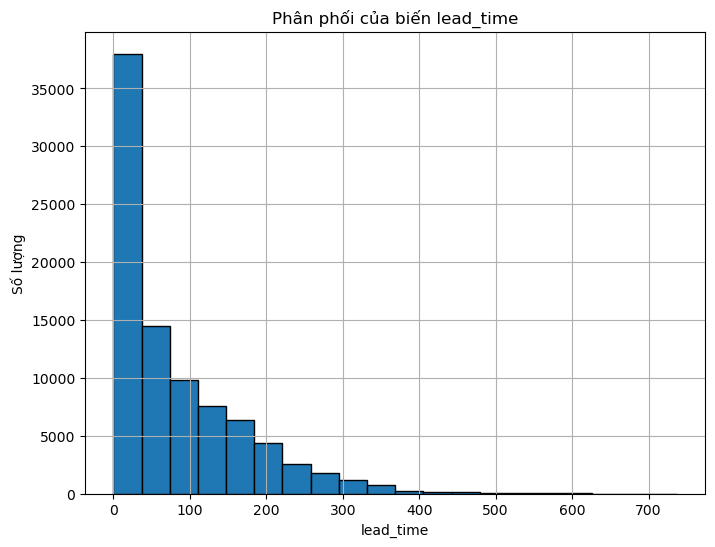


Thống kê mô tả của biến lead_time:
count    87396.000000
mean        79.891368
std         86.052325
min          0.000000
25%         11.000000
50%         49.000000
75%        125.000000
max        737.000000
Name: lead_time, dtype: float64


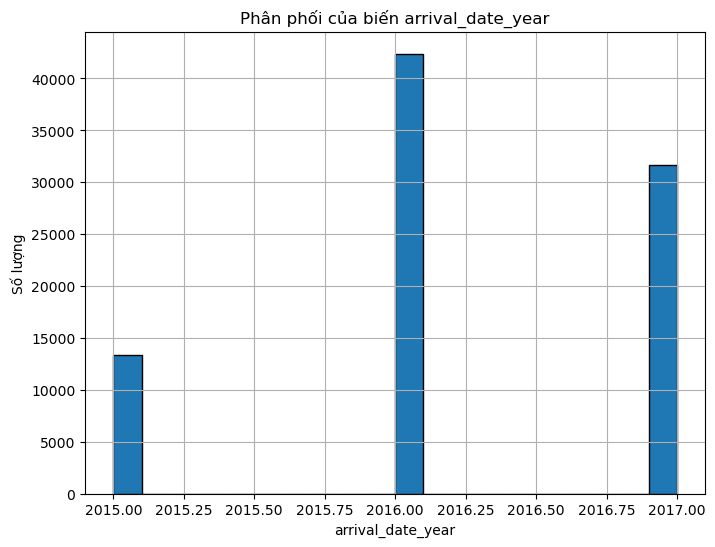


Thống kê mô tả của biến arrival_date_year:
count    87396.000000
mean      2016.210296
std          0.686102
min       2015.000000
25%       2016.000000
50%       2016.000000
75%       2017.000000
max       2017.000000
Name: arrival_date_year, dtype: float64


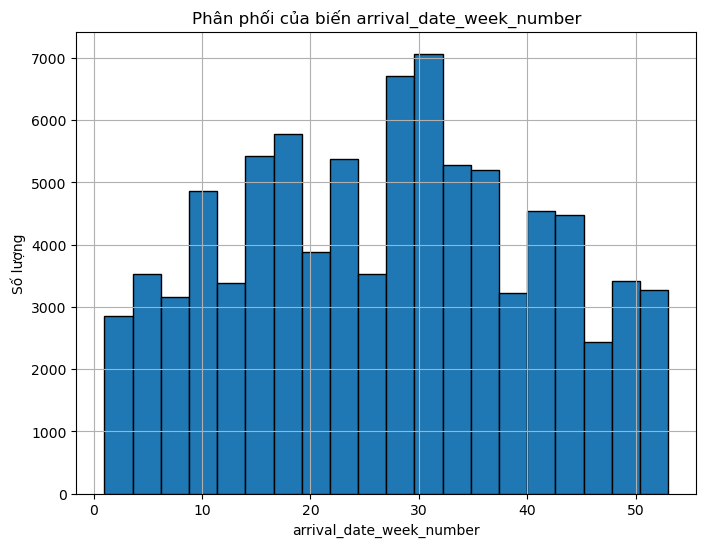


Thống kê mô tả của biến arrival_date_week_number:
count    87396.000000
mean        26.838334
std         13.674572
min          1.000000
25%         16.000000
50%         27.000000
75%         37.000000
max         53.000000
Name: arrival_date_week_number, dtype: float64


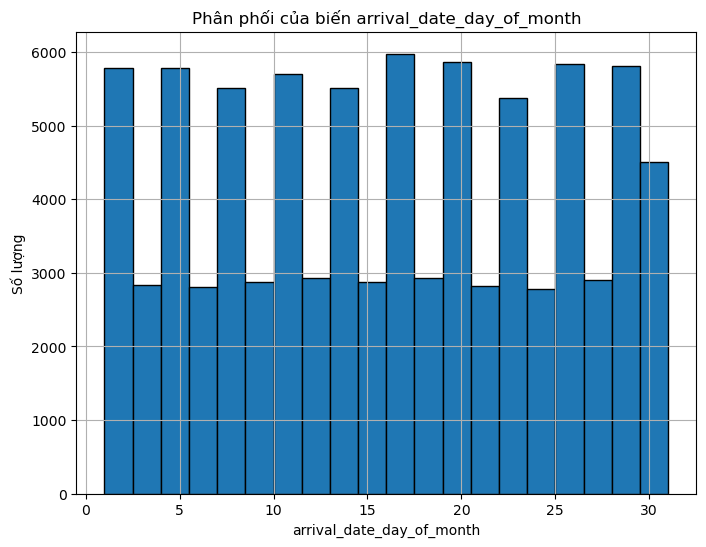


Thống kê mô tả của biến arrival_date_day_of_month:
count    87396.000000
mean        15.815541
std          8.835146
min          1.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         31.000000
Name: arrival_date_day_of_month, dtype: float64


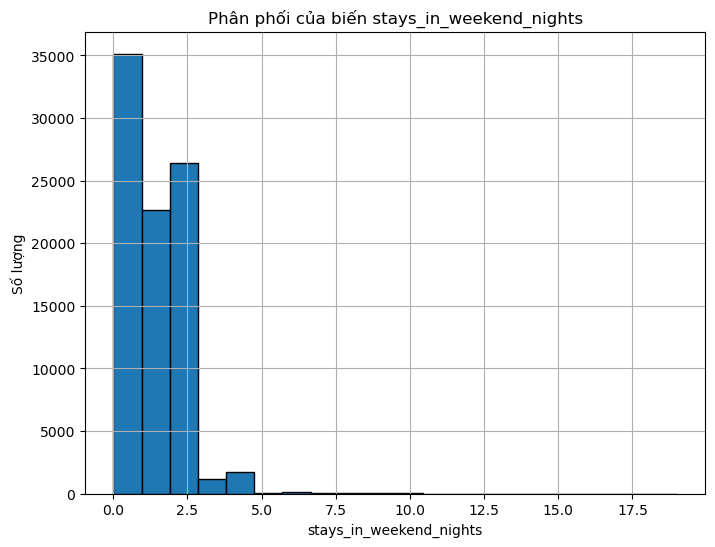


Thống kê mô tả của biến stays_in_weekend_nights:
count    87396.000000
mean         1.005263
std          1.031921
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         19.000000
Name: stays_in_weekend_nights, dtype: float64


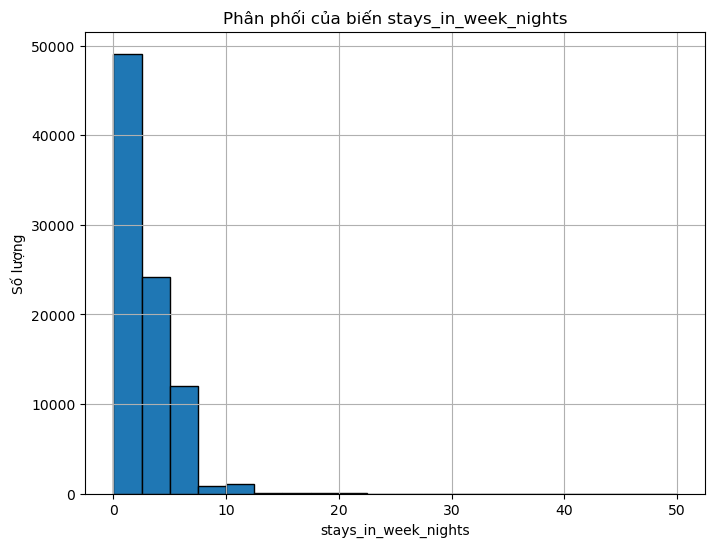


Thống kê mô tả của biến stays_in_week_nights:
count    87396.000000
mean         2.625395
std          2.053584
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         50.000000
Name: stays_in_week_nights, dtype: float64


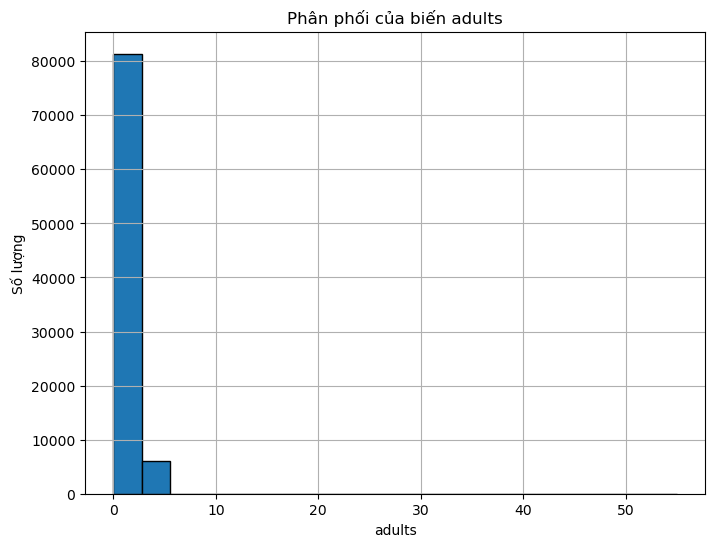


Thống kê mô tả của biến adults:
count    87396.000000
mean         1.875795
std          0.626500
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         55.000000
Name: adults, dtype: float64


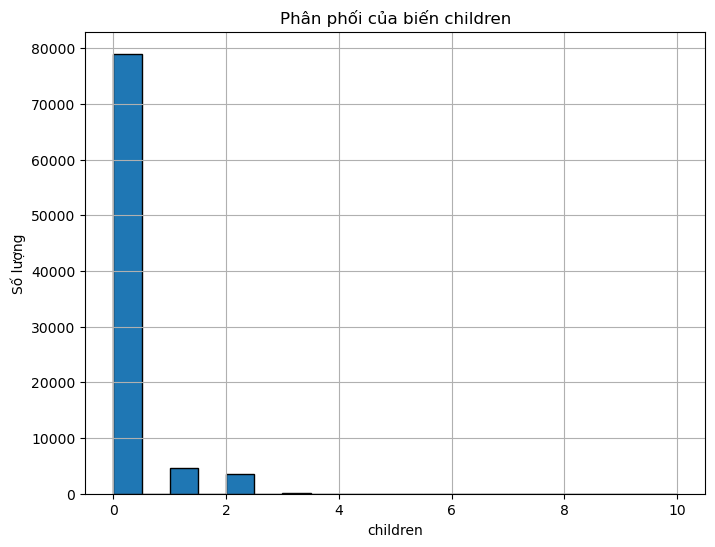


Thống kê mô tả của biến children:
count    87396.000000
mean         0.138633
std          0.455871
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: children, dtype: float64


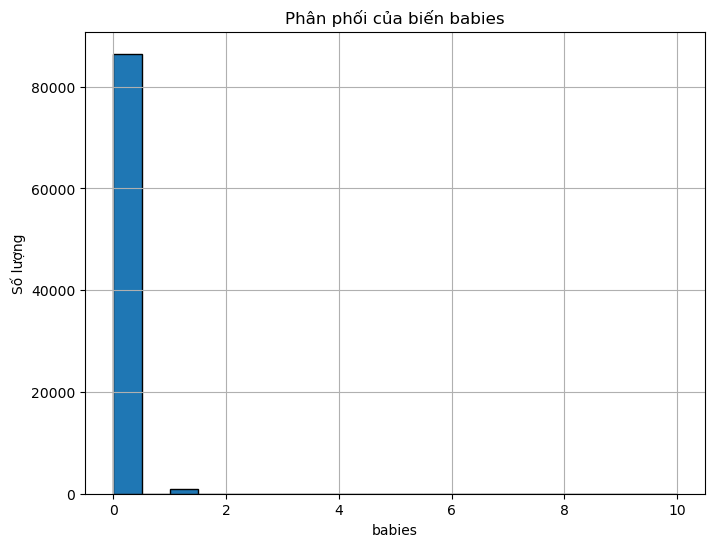


Thống kê mô tả của biến babies:
count    87396.000000
mean         0.010824
std          0.113597
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: babies, dtype: float64


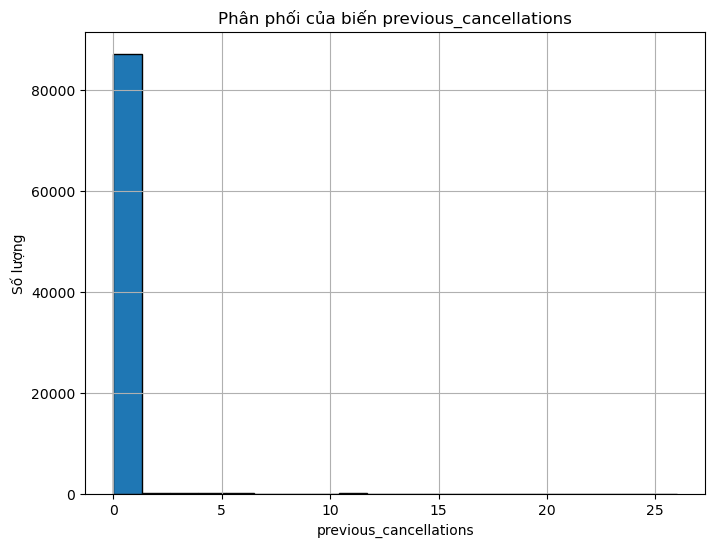


Thống kê mô tả của biến previous_cancellations:
count    87396.000000
mean         0.030413
std          0.369145
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         26.000000
Name: previous_cancellations, dtype: float64


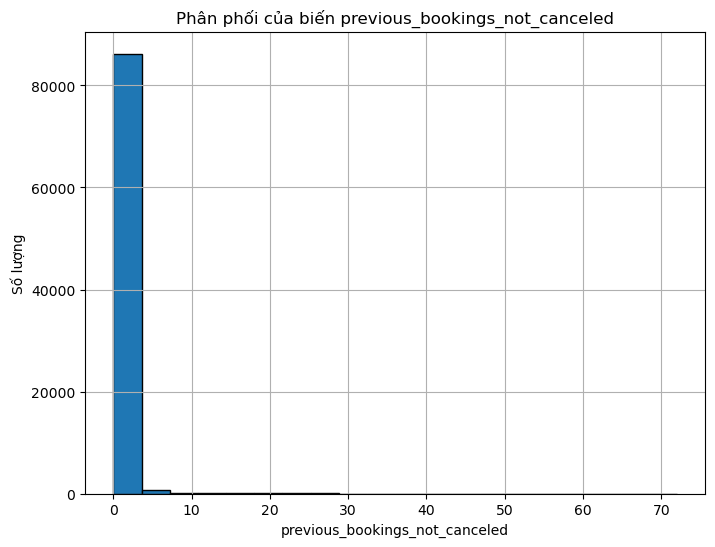


Thống kê mô tả của biến previous_bookings_not_canceled:
count    87396.000000
mean         0.183990
std          1.731894
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         72.000000
Name: previous_bookings_not_canceled, dtype: float64


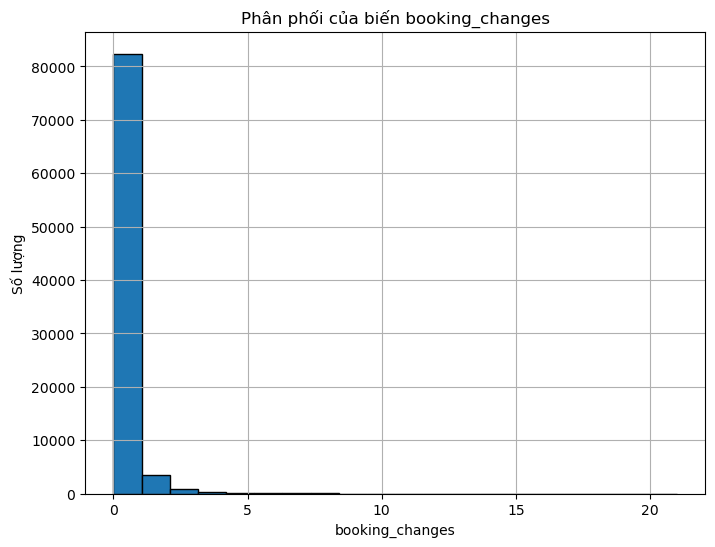


Thống kê mô tả của biến booking_changes:
count    87396.000000
mean         0.271603
std          0.727245
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         21.000000
Name: booking_changes, dtype: float64


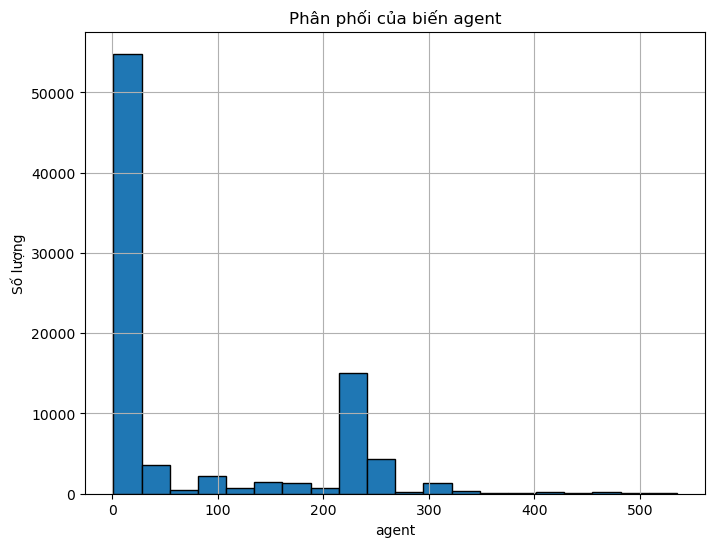


Thống kê mô tả của biến agent:
count    87396.000000
mean        82.957858
std        108.605400
min          1.000000
25%          9.000000
50%         14.000000
75%        234.000000
max        535.000000
Name: agent, dtype: float64


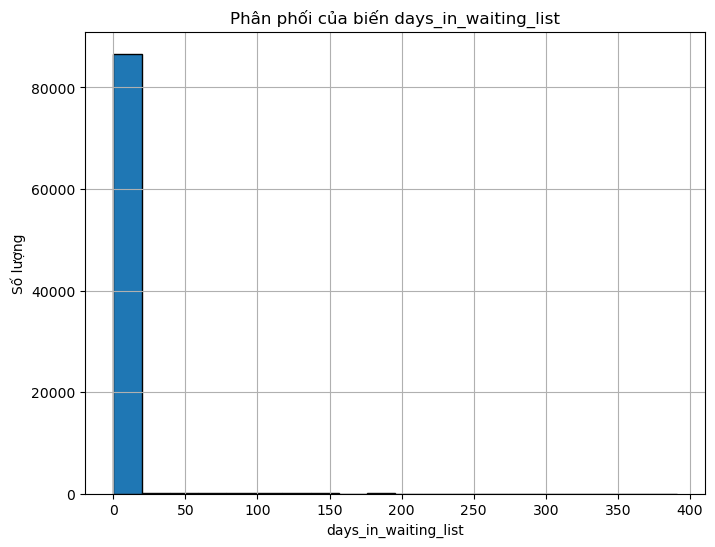


Thống kê mô tả của biến days_in_waiting_list:
count    87396.000000
mean         0.749565
std         10.015731
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        391.000000
Name: days_in_waiting_list, dtype: float64


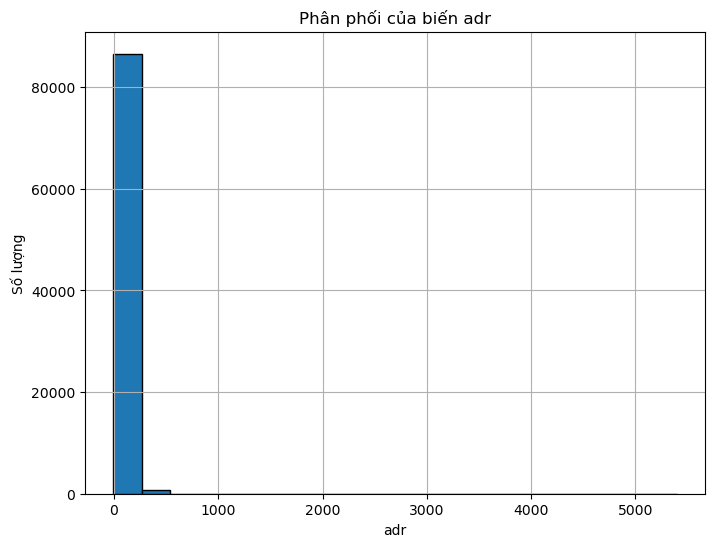


Thống kê mô tả của biến adr:
count    87396.000000
mean       106.337246
std         55.013953
min         -6.380000
25%         72.000000
50%         98.100000
75%        134.000000
max       5400.000000
Name: adr, dtype: float64


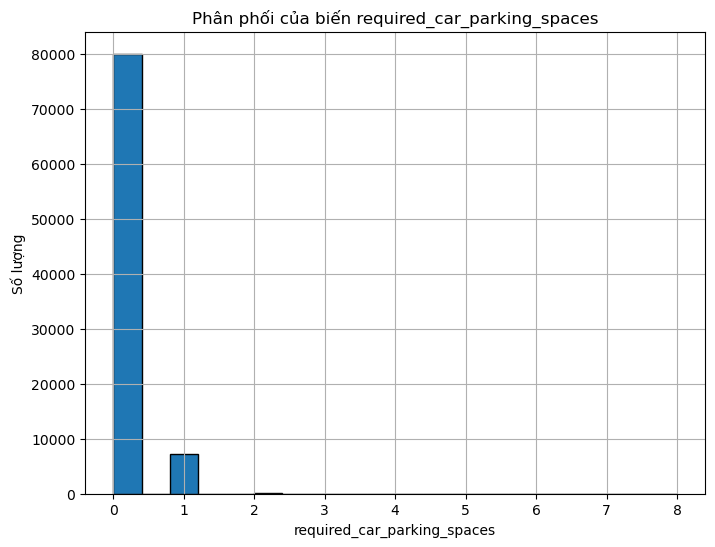


Thống kê mô tả của biến required_car_parking_spaces:
count    87396.000000
mean         0.084226
std          0.281533
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: required_car_parking_spaces, dtype: float64


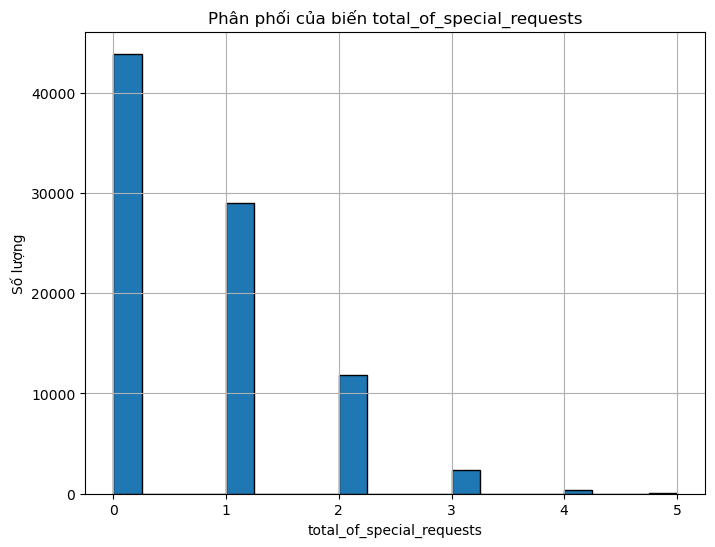


Thống kê mô tả của biến total_of_special_requests:
count    87396.000000
mean         0.698567
std          0.831946
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: total_of_special_requests, dtype: float64


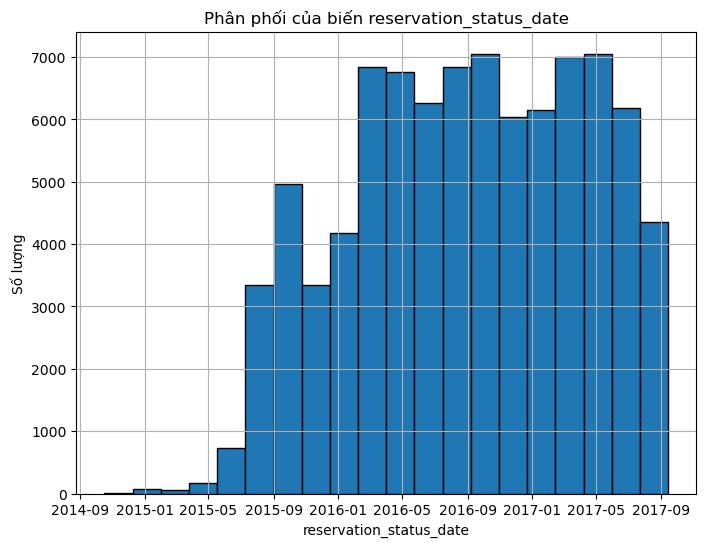


Thống kê mô tả của biến reservation_status_date:
count                            87396
mean     2016-08-31 03:44:08.963339520
min                2014-10-17 00:00:00
25%                2016-03-18 00:00:00
50%                2016-09-08 00:00:00
75%                2017-03-05 00:00:00
max                2017-09-14 00:00:00
Name: reservation_status_date, dtype: object


In [33]:
for column in num_col_df.columns:
    # Biểu đồ histogram
    plt.figure(figsize=(8, 6))
    plt.hist(data[column], bins=20, edgecolor='black')
    plt.title(f'Phân phối của biến {column}')
    plt.xlabel(column)
    plt.ylabel('Số lượng')
    plt.grid(True)
    plt.show()

    # Thống kê mô tả
    print(f"\nThống kê mô tả của biến {column}:")
    print(data[column].describe())

### **4. EDA 2D**

#### Phân tích hệ số tương quan của các biến Numerical

##### Bước 1: Tính ma trận hệ số tương quan

In [21]:
corr_matrix = num_col_df.corr()

In [22]:
corr_matrix

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
lead_time,1.000000,0.139135,0.101150,0.009866,0.235145,0.310129,0.140493,0.028650,-0.003614,0.005375,-0.078931,0.077028,0.072486,0.132152,0.023564,-0.086541,0.034240,0.114202
arrival_date_year,0.139135,1.000000,-0.514228,-0.010023,0.005144,0.003645,0.038619,0.041158,-0.023334,-0.054212,0.027256,0.008604,-0.004299,-0.027939,0.176088,-0.039807,0.064268,0.909016
arrival_date_week_number,0.101150,-0.514228,1.000000,0.093594,0.026868,0.027801,0.024362,0.013450,0.014260,0.007199,-0.020819,0.011902,0.019192,0.013843,0.098279,0.008946,0.046599,-0.163390
arrival_date_day_of_month,0.009866,-0.010023,0.093594,1.000000,-0.017803,-0.028190,-0.001125,0.015821,-0.000393,-0.008538,0.000152,0.006307,0.006438,0.006588,0.022591,0.009167,-0.001651,0.028672
stays_in_weekend_nights,0.235145,0.005144,0.026868,-0.017803,1.000000,0.555552,0.088284,0.028561,0.013668,-0.020636,-0.056653,0.050316,0.153424,-0.031680,0.038972,-0.042920,0.032396,0.004246
stays_in_week_nights,0.310129,0.003645,0.027801,-0.028190,0.555552,1.000000,0.095577,0.030479,0.016009,-0.018781,-0.058503,0.085044,0.185665,0.001905,0.053298,-0.044303,0.037823,-0.002843
adults,0.140493,0.038619,0.024362,-0.001125,0.088284,0.095577,1.000000,0.023712,0.016640,-0.042097,-0.120914,-0.048061,0.021480,-0.015740,0.248999,0.007802,0.112772,0.034441
children,0.028650,0.041158,0.013450,0.015821,0.028561,0.030479,0.023712,1.000000,0.017423,-0.019208,-0.029423,0.031313,0.040092,-0.020419,0.326293,0.036332,0.044596,0.041110
babies,-0.003614,-0.023334,0.014260,-0.000393,0.013668,0.016009,0.016640,0.017423,1.000000,-0.005395,-0.009193,0.081035,0.029631,-0.006840,0.023446,0.030885,0.094820,-0.017382
previous_cancellations,0.005375,-0.054212,0.007199,-0.008538,-0.020636,-0.018781,-0.042097,-0.019208,-0.005395,1.000000,0.392064,-0.010269,-0.030087,0.003682,-0.050267,-0.003399,0.001871,-0.070222


Bước 2: Trực quan bằng biểu đồ Heatmap

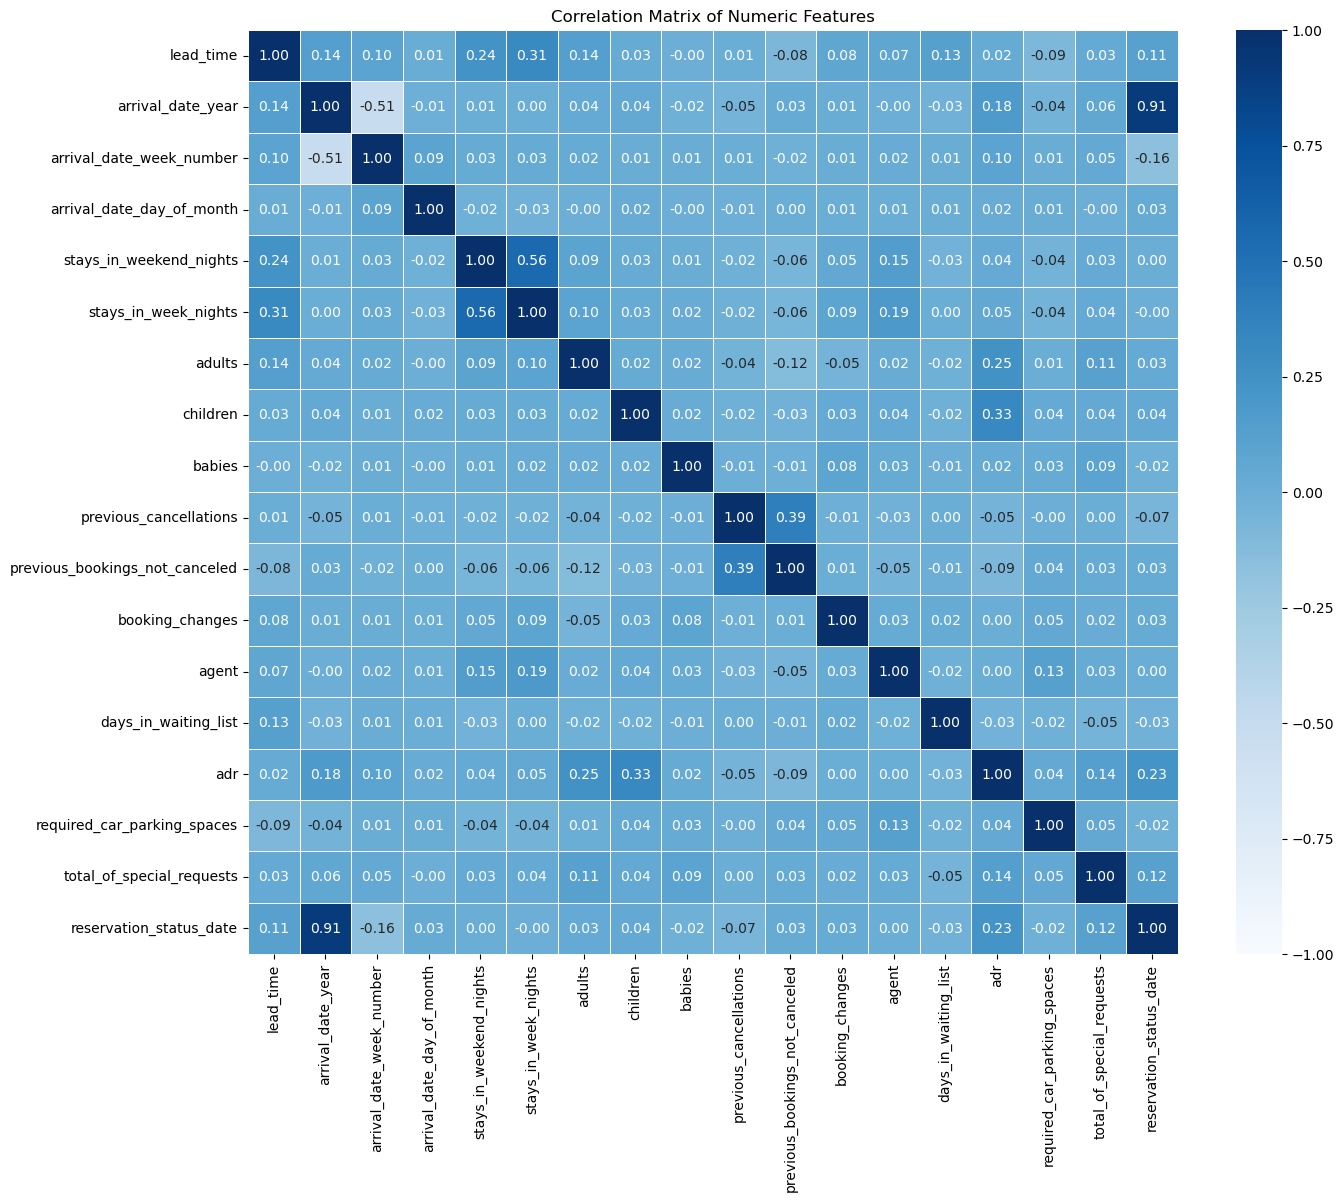

In [23]:
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5,cmap="Blues", vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

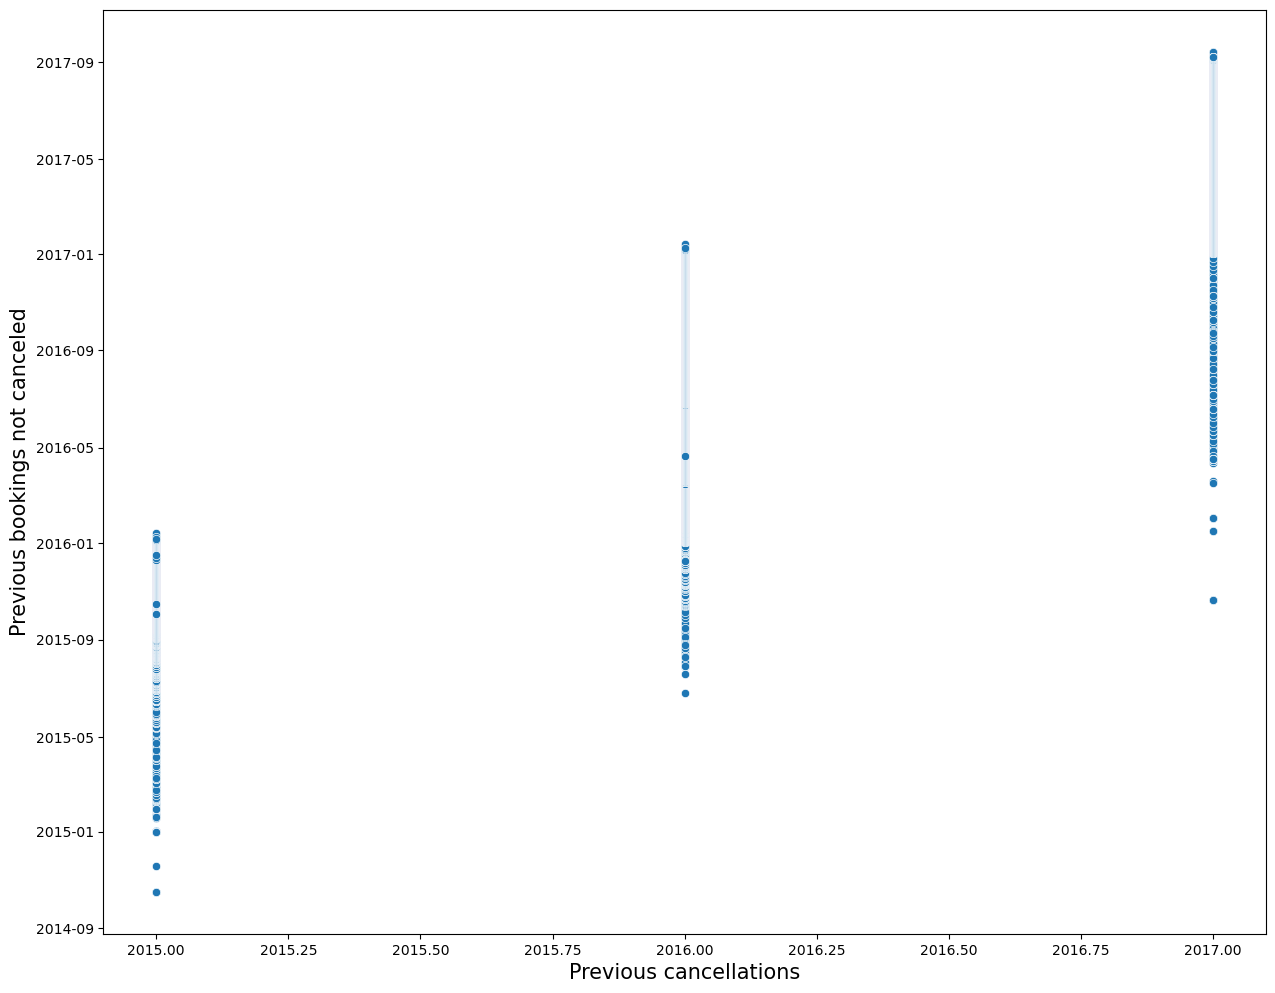

In [24]:
plt.figure(figsize=(15, 12))
sns.scatterplot(data=num_col_df, x="arrival_date_year", y="reservation_status_date")
plt.xlabel('Previous cancellations', size = 15)
plt.ylabel('Previous bookings not canceled', size = 15)
plt.show()

### **5. EDA 3D**

### **6. Insight**